In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr
from mplsoccer import VerticalPitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

ModuleNotFoundError: No module named 'cmasher'

In [85]:
#Read in the data
Team = pd.read_csv('result (44).csv') #matchfile
Team = Team[Team['teamId'] == 337] #team

In [86]:
Actions = Team[['playerId','isTouch','x','y','endX','endY','type/displayName','outcomeType/displayName']].copy() #trim cloumns

In [89]:
Actions['passer'] = Actions['playerId']
Actions['recipinent'] = Actions['passer'].shift(-1)
df = Actions[Actions['recipinent'] == 20874]
df

,playerId,isTouch,x,y,endX,endY,type/displayName,outcomeType/displayName,passer,recipinent
15,119120.0,True,3.3,50.3,21.3,100.0,Punch,Successful,119120.0,20874.0
39,271603.0,True,73.1,18.0,81.8,25.6,Pass,Successful,271603.0,20874.0
43,343975.0,True,79.1,8.6,79.1,20.1,Pass,Successful,343975.0,20874.0
49,271603.0,True,80.3,0.0,76.5,5.0,Pass,Successful,271603.0,20874.0
64,87449.0,True,55.2,91.1,57.8,75.0,Pass,Successful,87449.0,20874.0
...,...,...,...,...,...,...,...,...,...,...
1442,87449.0,True,76.1,68.5,68.9,90.6,Pass,Successful,87449.0,20874.0
1444,93894.0,True,70.8,98.1,57.6,92.9,Pass,Successful,93894.0,20874.0
1449,29239.0,True,25.7,72.4,35.7,77.0,Pass,Successful,29239.0,20874.0
1451,87449.0,True,30.5,67.5,33.3,75.1,Pass,Successful,87449.0,20874.0


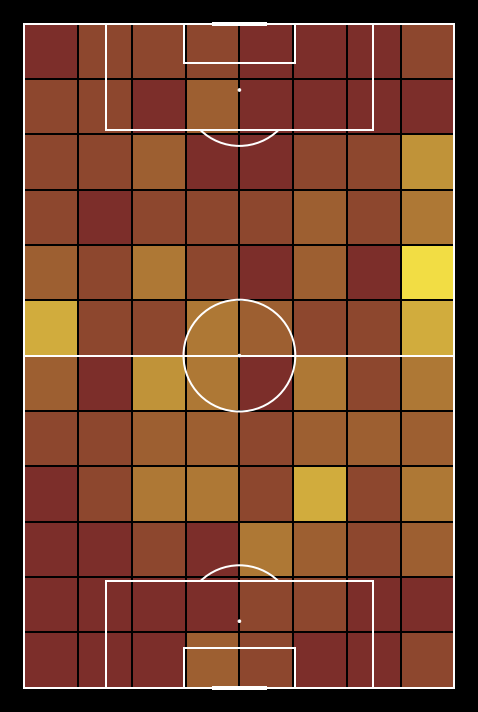

In [88]:
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)
el_greco_violet_cmap = LinearSegmentedColormap.from_list("El Greco Violet - 10 colors",
                                                         ['#332a49', '#8e78a0'], N=10)
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
# same color maps but with 100 colors
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)
el_greco_violet_cmap_100 = LinearSegmentedColormap.from_list("El Greco Violet - 100 colors",
                                                             ['#3b3154', '#8e78a0'], N=100)
el_greco_yellow_cmap_100 = LinearSegmentedColormap.from_list("El Greco Yellow - 100 colors",
                                                             ['#7c2e2a', '#f2dd44'], N=100)
flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)
redpink_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#550fa6', '#fff8ba'], N=100)

pitch = VerticalPitch(pitch_type='wyscout',line_color='w', line_zorder=2, pitch_color = 'black')
fig, ax = pitch.draw(figsize=(13.5, 10))
fig.set_facecolor('black')
plt.gca().invert_xaxis()
'''
kde = pitch.kdeplot(df.x, df.y, ax=ax,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap= 'magma')
'''
bs = pitch.bin_statistic(df.x, df.y, bins=(12, 8))
heatmap = pitch.heatmap(bs,ax=ax,edgecolor ='black', linewidth = 1, cmap=el_greco_yellow_cmap_100)